In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('seaborn-poster')
import numpy as np

In [2]:
# take instructor data input here
data = pd.DataFrame.from_csv('Shibberu_CourseEvalData_Raw_20160616.csv',index_col=None)
year = None # must be a String or None

In [3]:
data = data[['SURVEY_NAME','COURSE','QUESTION_NO','RESPONSE_1_COUNT','RESPONSE_2_COUNT','RESPONSE_3_COUNT',
             'RESPONSE_4_COUNT','RESPONSE_5_COUNT']] # only taking the needed columns

data = data[data.QUESTION_NO < 4] # removing non-typical survey questions

data.columns = ['SURVEY_NAME','COURSE','QUESTION_NO','R1','R2','R3','R4','R5'] # shortening data headers

In [4]:
if year is not None:
    data = data[data.SURVEY_NAME.str.contains('_' + year)]

In [5]:
# question description dictionary
questions = {'1.04':'Quality of learning',
             '2.03':'Lab and course reinforce',
             '2.06':'Workload',
             '2.07':'Course overall',
             '3.02':'Professor well-prepared',
             '3.04':'Helpful teaching methods',
             '3.07':'Professor availability',
             '3.09':"Professor's interest in topic",
             '3.1':'Professor overall'}

In [6]:
# total response counts/question
lickert_counts = data.drop(['SURVEY_NAME','COURSE'],1).groupby('QUESTION_NO').sum()

# total responses per question (used for percentages chart)
lickert_counts['TOTAL'] = lickert_counts.sum(axis=1)
lickert_counts = lickert_counts.reset_index()

In [7]:
# creating percentage data from raw count totals
lickert_percents = pd.DataFrame()
lickert_percents['QUESTION_NO'] = lickert_counts.QUESTION_NO
lickert_percents['R5%'] = lickert_counts.R5 / lickert_counts.TOTAL * 100
lickert_percents['R4%'] = lickert_counts.R4 / lickert_counts.TOTAL * 100
lickert_percents['R3%'] = lickert_counts.R3 / lickert_counts.TOTAL * 100
lickert_percents['R2%'] = lickert_counts.R2 / lickert_counts.TOTAL * 100
lickert_percents['R1%'] = lickert_counts.R1 / lickert_counts.TOTAL * 100
# lickert_percents.sum(axis=1) # sanity check; should all be 100

In [8]:
# creating column of buffer values to offset bars
sums = lickert_percents['R5%'] + lickert_percents['R4%'] + 0.5 * lickert_percents['R3%']
maximum = sums.max()
buffer = maximum - sums
lickert_percents.insert(1,'BUFFER',buffer)

In [9]:
# sorting bars by 'agree' percentage and adding Lickert response headers
lp = lickert_percents.sort_values(by='BUFFER')
lp.columns = ['QUESTION_NO', 'BUFFER', 'Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

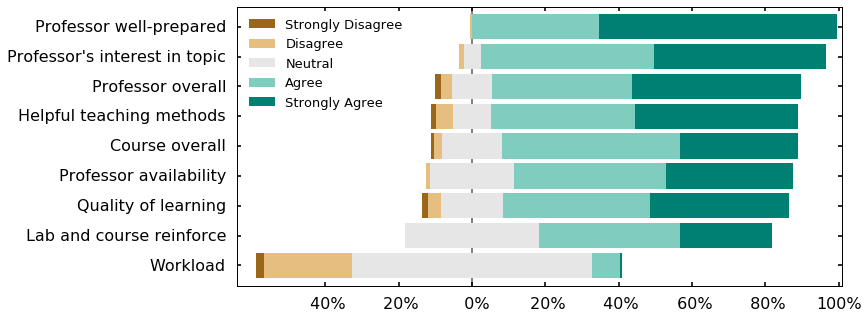

In [10]:
# custom colormap for buffer and diverging colors
cm = matplotlib.colors.ListedColormap([[1, 1, 1, 0], # transparent buffer
                                [0.6, 0.4, 0.1], [0.9, 0.75, 0.5], '0.9',
                                [0.5, 0.8, 0.75], [0, 0.5, 0.45]])

# creating initial stacked bar chart using custom colormap
p = lp.plot.barh(x='QUESTION_NO',stacked=True,colormap=cm,edgecolor='none',figsize=(10.84,5),width=0.85)

# remove BUFFER from legend
lines, labels = p.get_legend_handles_labels()
p.legend(lines[1:], labels[1:], loc='upper left', fontsize=13, frameon=False)

# set x-axis tick locations and values
ticks = []
for x in range(-2,6):
    ticks.append(maximum+(x*20))

p.set_xticks(ticks)
p.set_xlim(-5, p.get_xlim()[1])
xvals = p.get_xticks()
p.set_xticklabels(['{:3.0f}%'.format(np.absolute(x-maximum)) for x in xvals])

# set y-axis values and new line location
yvals = p.get_yticklabels()
p.set_yticklabels(['{}'.format(questions.get(y.get_text())) for y in yvals])
p.set_ylabel('',fontsize=0) # get rid of y-axis label
p.axvline(maximum, color='0.5', linewidth=2).set_zorder(0)